In [1]:
!pip install lasio

In [2]:
import lasio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os
from scipy.ndimage import median_filter

In [3]:
# !pip install gdown
!gdown --folder https://drive.google.com/drive/folders/1xOmhNRJg6u7mKeusU2k2AKvm2bR2hi1-?usp=sharing -O pasta_compartilhada
!ls pasta_compartilhada

Retrieving folder contents
Processing file 1SJFtPJIJN6msI9XKxc9q8ARS7BZjp8sr 3-MGP-4-BA.las
Processing file 1y392Ua7dqcAfiLVSbU3kUHGtmRk8u7GN 3-MGP-6-BA.las
Processing file 1aGzZ1khrPflZvV6NR21F1ut5wy1I2sNs 3-MGP-20-BA.las
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1SJFtPJIJN6msI9XKxc9q8ARS7BZjp8sr
To: /content/pasta_compartilhada/3-MGP-4-BA.las
100% 9.01M/9.01M [00:00<00:00, 95.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1y392Ua7dqcAfiLVSbU3kUHGtmRk8u7GN
To: /content/pasta_compartilhada/3-MGP-6-BA.las
100% 5.42M/5.42M [00:00<00:00, 128MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aGzZ1khrPflZvV6NR21F1ut5wy1I2sNs
To: /content/pasta_compartilhada/3-MGP-20-BA.las
100% 10.4M/10.4M [00:00<00:00, 67.6MB/s]
Download completed
3-MGP-20-BA.las  3-MGP-4-BA.las  3-MGP-6-BA.las


In [4]:
las = lasio.read("pasta_compartilhada/3-MGP-4-BA.las")
df = las.df()
df.index.name = 'MD'
df.head()

,SHRP,CQ,CCRE,NP,DEVI,HT34,HAZI,HT41,CLEX,QUAL,...,DT,NEUT,GR,NPHI,CAL2,CALI,TENS,NCNL,FCNL,SP
MD,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['SHRP', 'CQ', 'CCRE', 'NP', 'DEVI', 'HT34', 'HAZI', 'HT41', 'CLEX',
       'QUAL', 'C13', 'HT12', 'DIP', 'DEPT:2', 'P1AZ', 'C24', 'PART', 'DPAP',
       'HT23', 'CDDS', 'AZIM', 'SC', 'RB', 'NM24', 'NM13', 'DCX', 'AZIE',
       'OFLG', 'ILD', 'AMP', 'FFDC', 'RHOB', 'DRHO', 'NFDC', 'SFLU', 'DT',
       'NEUT', 'GR', 'NPHI', 'CAL2', 'CALI', 'TENS', 'NCNL', 'FCNL', 'SP'],
      dtype='object')

In [6]:
las.header

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS log ASCII Standa"),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One line per depth ste"),
  HeaderItem(mnemonic="DLM", unit="", value="SPACE", descr="Column Data Section ")],
 'Well': [HeaderItem(mnemonic="STRT", unit="m", value="0.0", descr="START DEPTH"),
  HeaderItem(mnemonic="STOP", unit="m", value="3543.0", descr="STOP DEPTH"),
  HeaderItem(mnemonic="STEP", unit="m", value="0.2", descr="STEP"),
  HeaderItem(mnemonic="NULL", unit="", value="-9999.25", descr="NULL VALUE"),
  HeaderItem(mnemonic="COMP", unit="", value="Undefined", descr="COMPANY"),
  HeaderItem(mnemonic="WELL", unit="", value="3MGP0020BA", descr="WELL"),
  HeaderItem(mnemonic="FLD", unit="", value="Undefined", descr="FIELD"),
  HeaderItem(mnemonic="LOC", unit="", value="3MGP0020BA", descr="LOCATION"),
  HeaderItem(mnemonic="PROV", unit="", value="", descr="PROVINCE"),
  HeaderItem(mnemonic="CNTY", unit="", value="", descr="COUNTY

In [7]:
cols = ["GR", "SP", "CALI", 'ILD', 'SFLU', 'DT', 'RHOB', 'DRHO', 'NPHI']

In [8]:
df[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
GR,15783.0,50.561725,10.069654,16.96875,46.093750,52.390620,57.621090,87.92969
SP,16275.0,99.806713,36.450866,-36.09212,76.373775,98.547120,132.000000,182.01953
CALI,15550.0,12.378885,2.012136,6.21000,11.040162,12.186755,13.434505,17.83301
ILD,15963.0,8.806783,48.481189,0.50061,2.177860,3.662840,7.492190,2000.00004
SFLU,15778.0,4.776305,3.356500,0.19194,2.490250,3.447275,5.766602,27.66936
DT,15768.0,89.315328,20.123604,8.68359,74.501955,84.416015,101.679257,175.16016
RHOB,13949.0,2.370298,0.169363,2.00002,2.250660,2.396820,2.491730,2.74370
DRHO,13923.0,0.091113,0.097574,-1.20949,0.055660,0.096480,0.134110,0.36137
NPHI,14811.0,0.276274,0.103824,0.02563,0.197050,0.267420,0.343790,0.81687


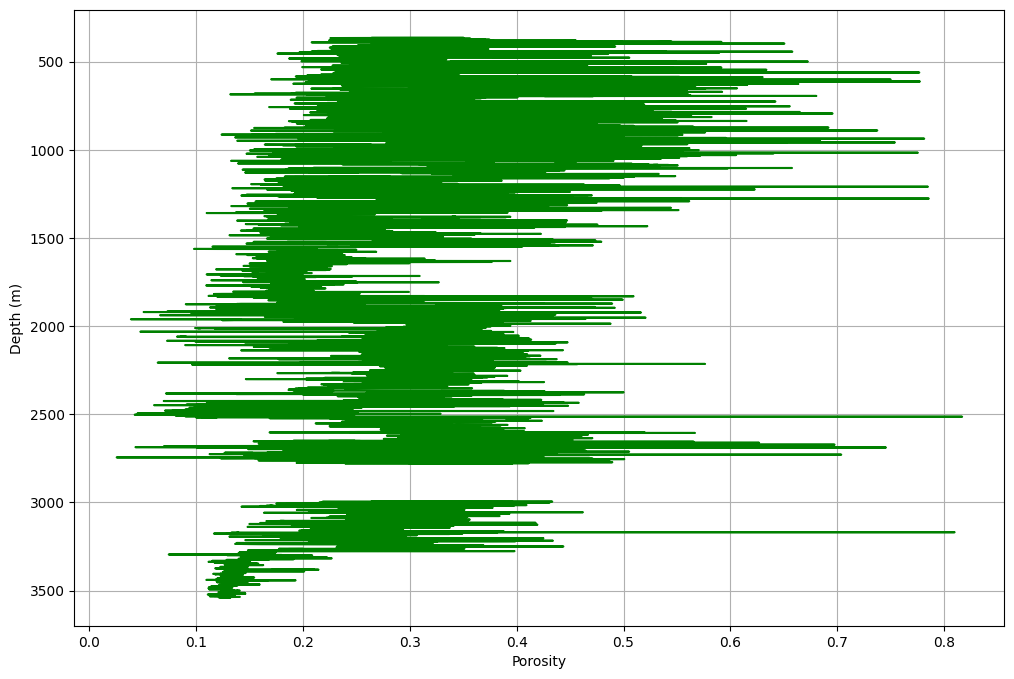

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df['NPHI'], df.index, color='green')
plt.gca().invert_yaxis()
plt.xlabel('Porosity')
plt.ylabel('Depth (m)')
plt.grid()
plt.show()

In [10]:
from scipy.ndimage import median_filter, gaussian_filter1d, uniform_filter1d

# filtro da mediana
df['NPHI_mediana'] = median_filter(df['NPHI'], size=3)

# filtro gaussiano
df['NPHI_gauss'] = gaussian_filter1d(df['NPHI'], sigma=2)

# filtro da média móvel
df['NPHI_media'] = df['NPHI'].rolling(window=3, center=True, min_periods=1).mean()

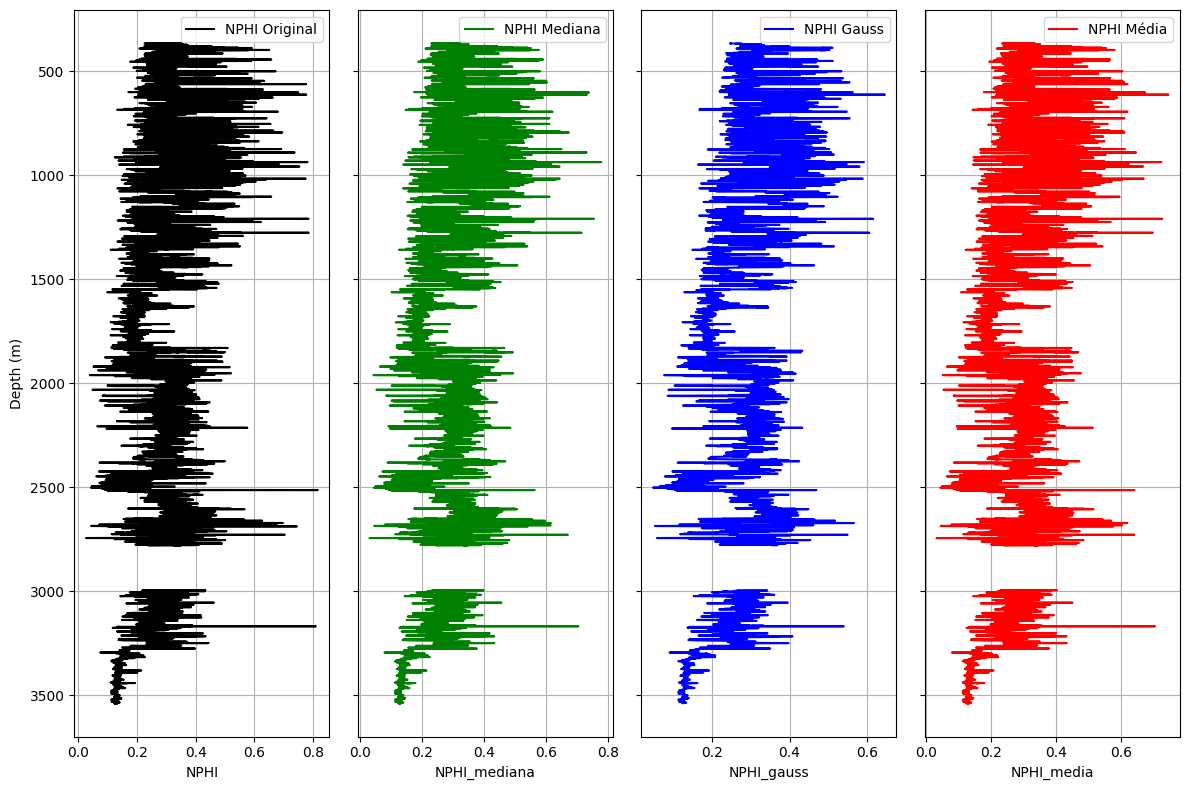

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(12, 8), sharey=True)

# Original
axes[0].plot(df['NPHI'], df.index, color='black', label='NPHI Original')
axes[0].invert_yaxis()
axes[0].set_xlabel('NPHI')
axes[0].set_ylabel('Depth (m)')
axes[0].grid()
axes[0].legend()

# Mediana
axes[1].plot(df['NPHI_mediana'], df.index, color='green', label='NPHI Mediana')
axes[1].set_xlabel('NPHI_mediana')
axes[1].grid()
axes[1].legend()

# Gaussiano
axes[2].plot(df['NPHI_gauss'], df.index, color='blue', label='NPHI Gauss')
axes[2].set_xlabel('NPHI_gauss')
axes[2].grid()
axes[2].legend()

# Média móvel
axes[3].plot(df['NPHI_media'], df.index, color='red', label='NPHI Média')
axes[3].set_xlabel('NPHI_media')
axes[3].grid()
axes[3].legend()

plt.tight_layout()
plt.show()


In [12]:
cols = ["NPHI", "NPHI_mediana", "NPHI_gauss", 'NPHI_media']

In [13]:
df[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
NPHI,14811.0,0.276274,0.103824,0.025630,0.197050,0.267420,0.343790,0.816870
NPHI_mediana,14813.0,0.275703,0.101753,0.029840,0.197770,0.267850,0.343240,0.779370
NPHI_gauss,14779.0,0.276308,0.093857,0.049412,0.202870,0.275232,0.339366,0.644849
NPHI_media,14815.0,0.276261,0.100164,0.031877,0.199057,0.270600,0.343230,0.744483


## Dados Faltando

In [14]:
cols = ["GR", "SP", "CALI", 'ILD', 'SFLU', 'DT', 'RHOB', 'DRHO', 'NPHI', 'NEUT']
df = df[cols]
df['WELL'] = "3-MGP-4-BA"

<Axes: >

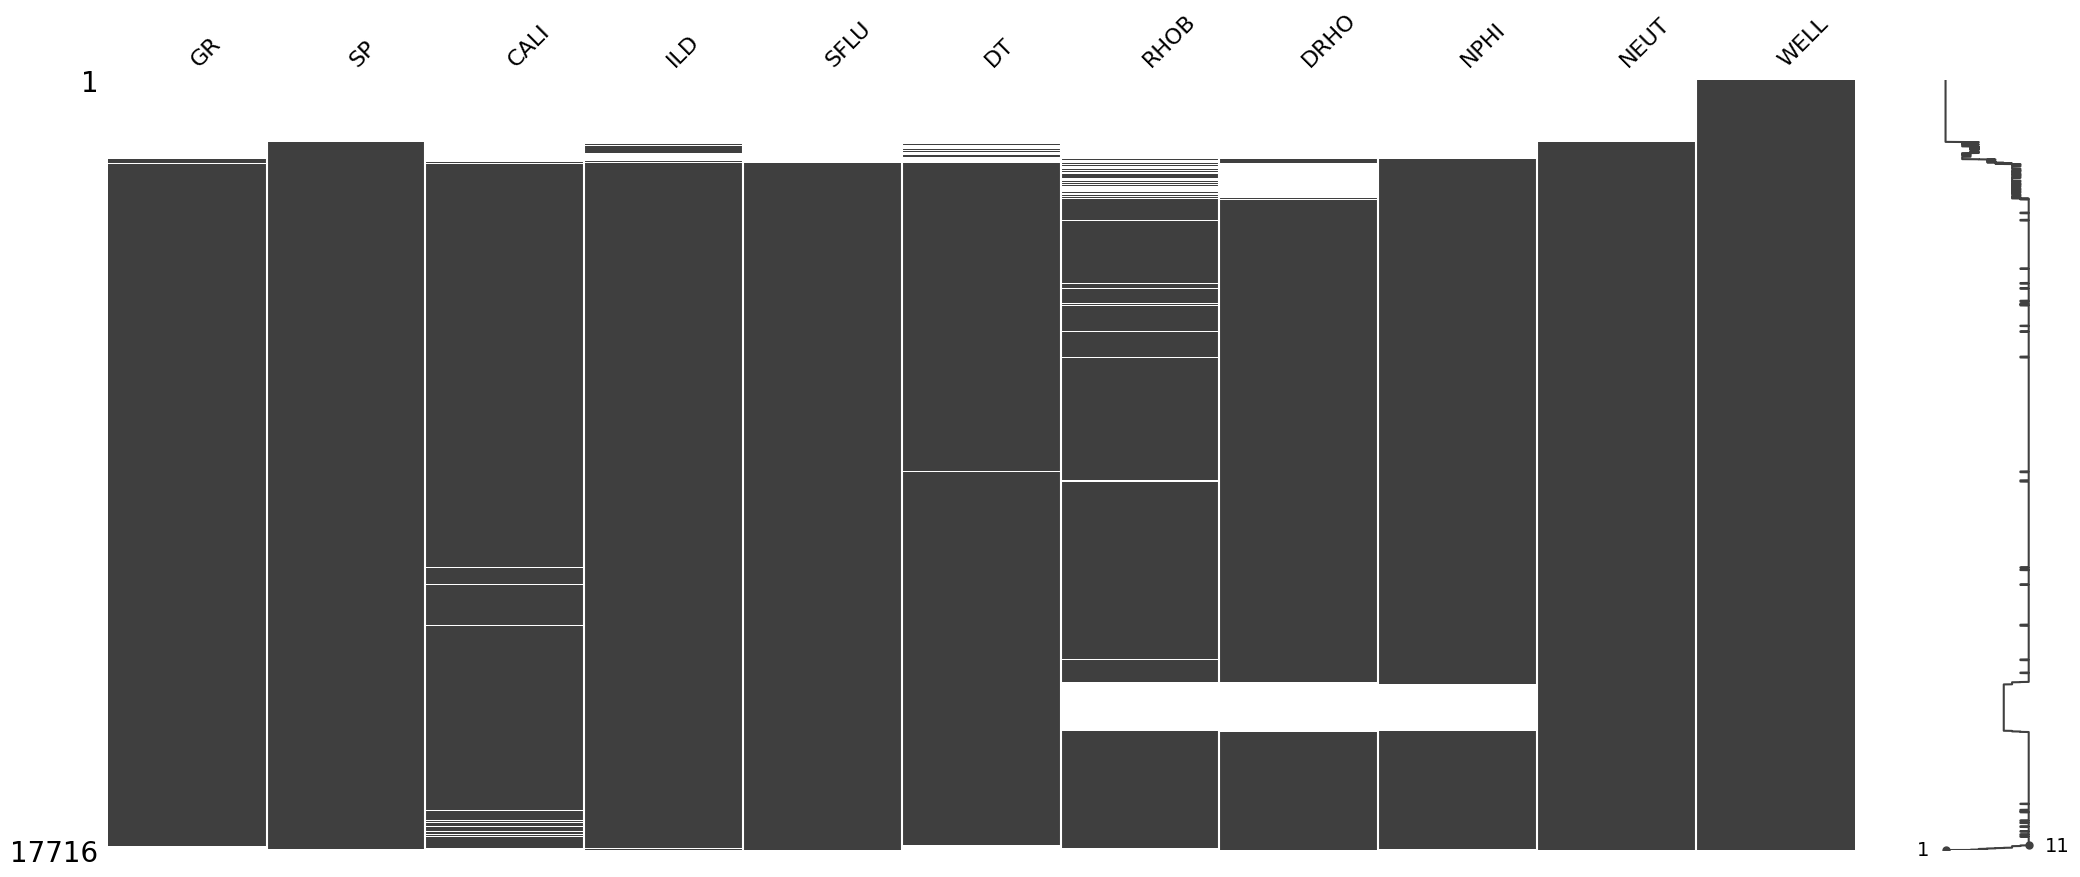

In [15]:
import missingno as msno

msno.matrix(df)

<Axes: >

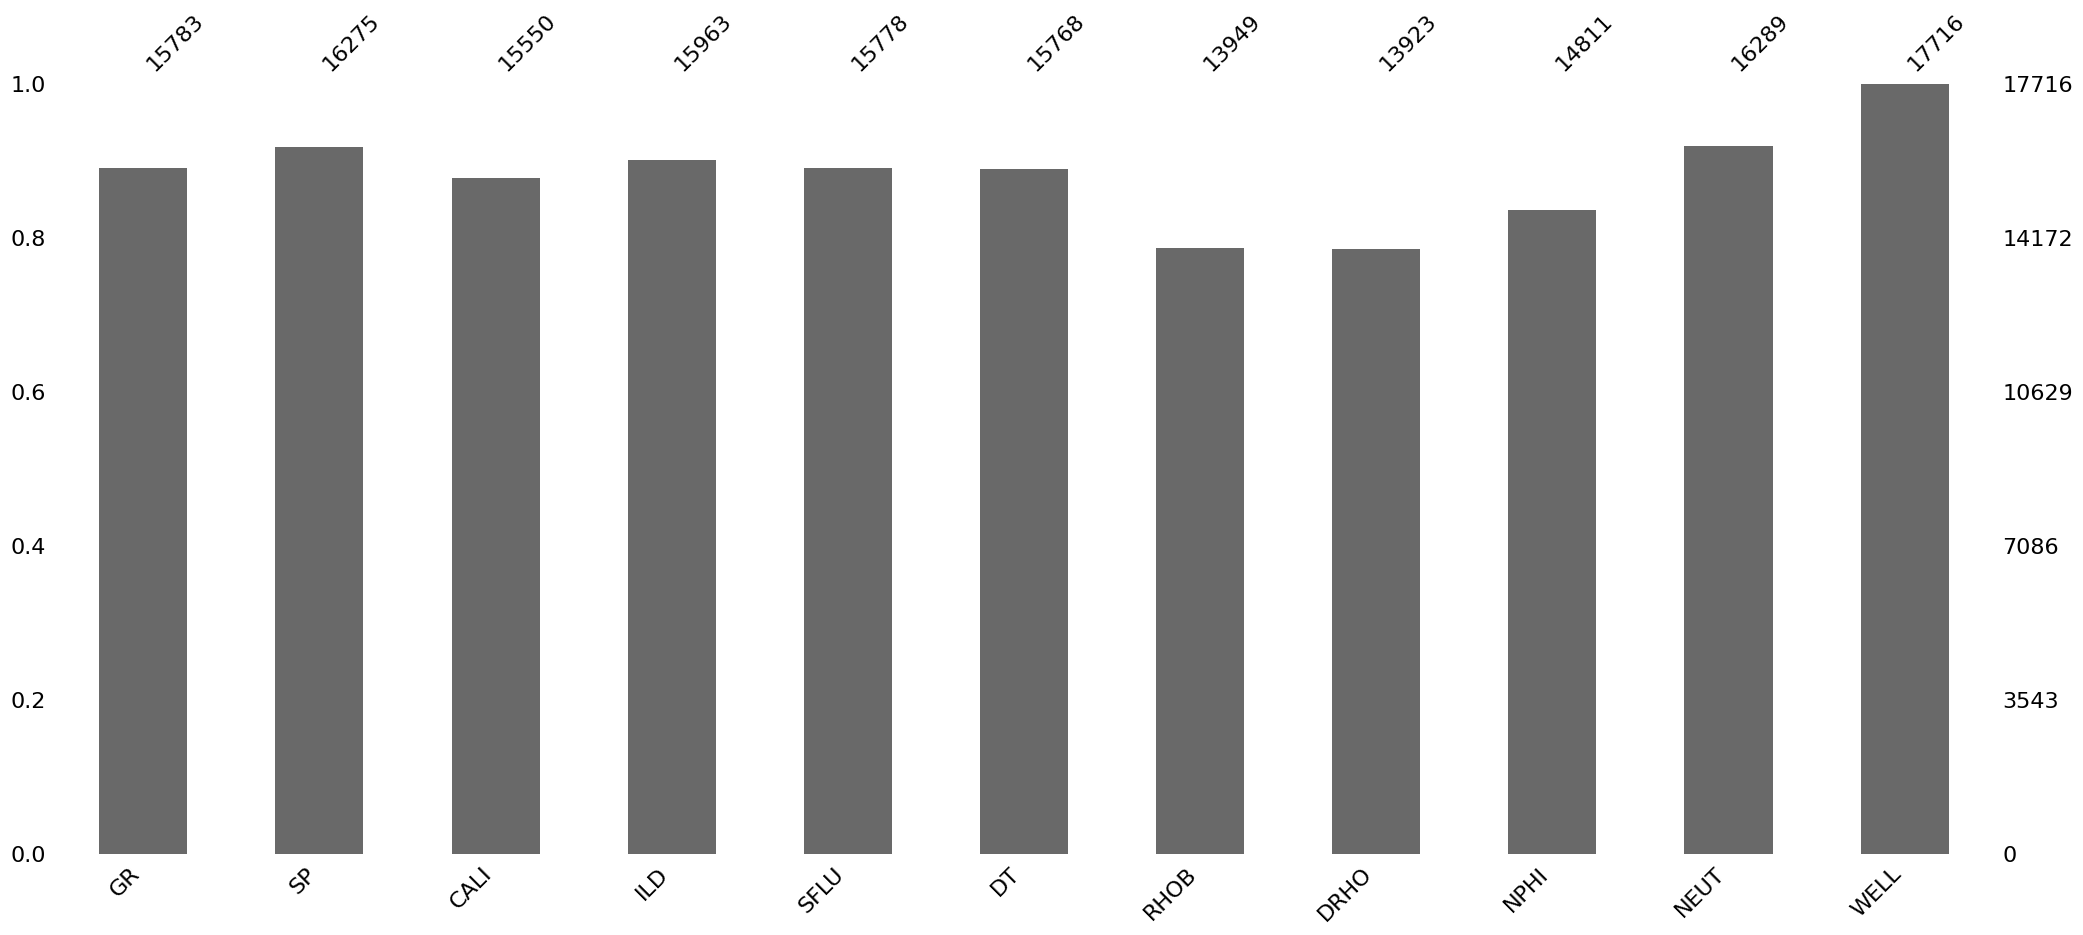

In [16]:
msno.bar(df)

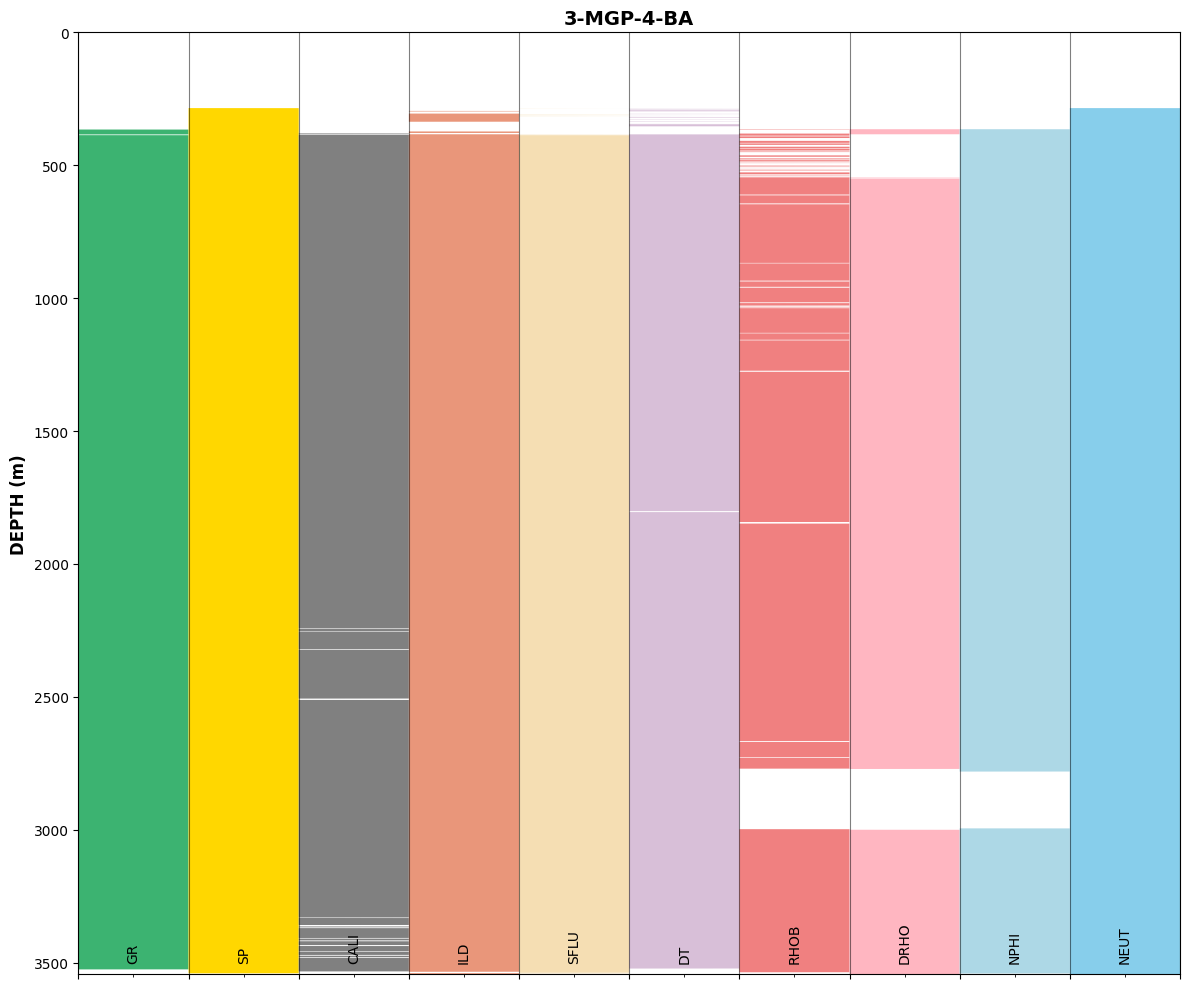

In [17]:
import numpy as np
import matplotlib.pyplot as plt

cols = ["GR", "SP", "CALI", "ILD", "SFLU", "DT", "RHOB", "DRHO", "NPHI", "NEUT"]

colors = {
    "GR": "mediumseagreen",
    "SP": "gold",
    "CALI": "grey",
    "ILD": "darksalmon",
    "SFLU": "wheat",
    "DT": "thistle",
    "RHOB": "lightcoral",
    "DRHO": "lightpink",
    "NPHI": "lightblue",
    "NEUT": "skyblue",
}

depth = df.index.values

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

for i, col in enumerate(cols):
    mask = df[col].notna().astype(int).values  # 1 = tem dado, 0 = NaN
    x_left = np.full_like(depth, i, dtype=float)
    x_right = x_left + mask
    ax.fill_betweenx(depth, x_left, x_right, facecolor=colors.get(col, "lightgrey"), linewidth=0)

n = len(cols)
ax.set_xlim(0, n)
ax.set_xticks(range(0, n+1), minor=False)
ax.set_xticks([i+0.5 for i in range(n)], minor=True)
ax.set_xticklabels([""]*(n+1), minor=False)
ax.set_xticklabels(cols, rotation='vertical', minor=True, va='bottom')
ax.tick_params(axis='x', which='minor', pad=-10)

ax.set_ylim(depth.max(), depth.min())
ax.set_ylabel('DEPTH (m)', fontsize=12, fontweight='bold')

ax.grid(axis='x', alpha=0.5, color='black')
ax.set_title(df.get('WELL', pd.Series(["WELL"])).iloc[0] if 'WELL' in df.columns else "WELL",
             fontsize=14, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(hspace=0.15, wspace=0.25)
plt.savefig('missingdata.png', dpi=300)
plt.show()


In [54]:
df["Vp"] = 1e6 / df["DT"]

In [55]:
a, b = 0.31, 0.25
df["RHOB_gardner"] = a * (df["Vp"] ** b)

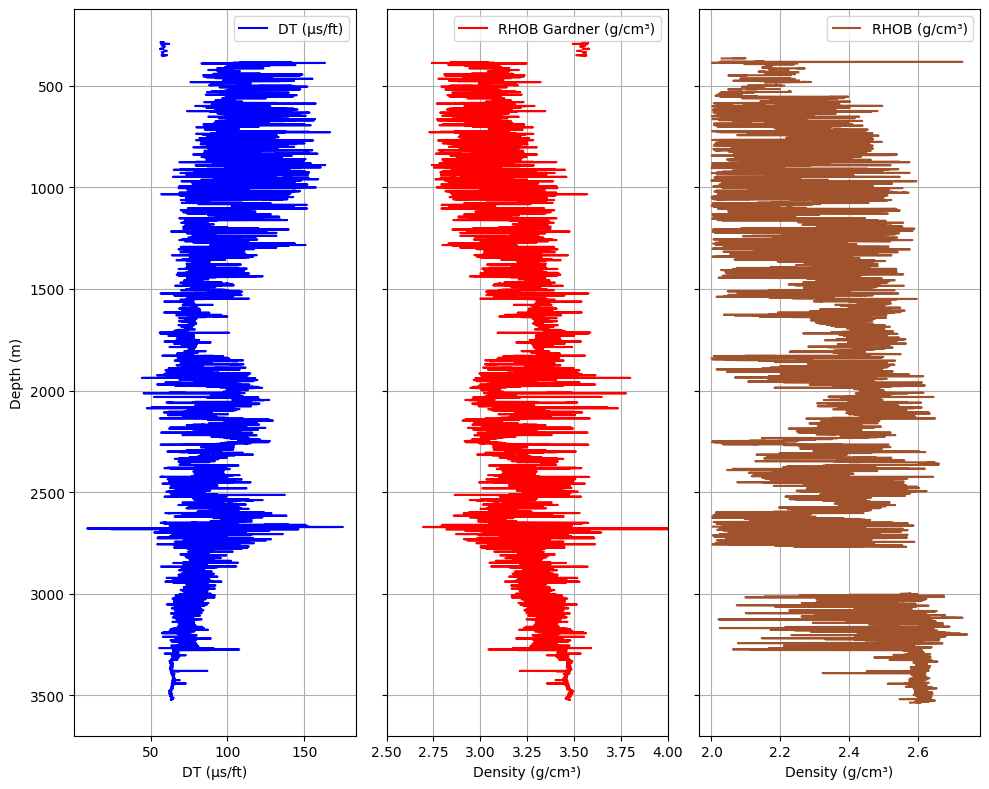

In [61]:
fig, ax1 = plt.subplots(1, 3, figsize=(10, 8), sharey=True)

ax1[0].plot(df["DT"], df.index, color="blue", label="DT (µs/ft)")
ax1[0].invert_yaxis()
ax1[0].set_xlabel("DT (µs/ft)")
ax1[0].set_ylabel("Depth (m)")
ax1[0].grid()
ax1[0].legend()

ax1[1].plot(df["RHOB_gardner"], df.index, color="red", label="RHOB Gardner (g/cm³)")
ax1[1].set_xlabel("Density (g/cm³)")
ax1[1].grid()
ax1[1].set_xlim(2.5,4)
ax1[1].legend()

ax1[2].plot(df["RHOB"], df.index, color="sienna", label="RHOB (g/cm³)")
ax1[2].set_xlabel("Density (g/cm³)")
ax1[2].grid()
ax1[2].legend()

plt.tight_layout()
plt.show()

## Wlly

In [18]:
!pip install welly

In [19]:
from welly import Well
from welly import Curve

import matplotlib.pyplot as plt

In [20]:
well = Well.from_las("pasta_compartilhada/3-MGP-4-BA.las")


In [21]:
well

Well(uwi: 'Undefined', name: '3MGP0020BA', 45 curves: ['SHRP', 'CQ', 'CCRE', 'NP', 'DEVI', 'HT34', 'HAZI', 'HT41', 'CLEX', 'QUAL', 'C13', 'HT12', 'DIP', 'DEPT:2', 'P1AZ', 'C24', 'PART', 'DPAP', 'HT23', 'CDDS', 'AZIM', 'SC', 'RB', 'NM24', 'NM13', 'DCX', 'AZIE', 'OFLG', 'ILD', 'AMP', 'FFDC', 'RHOB', 'DRHO', 'NFDC', 'SFLU', 'DT', 'NEUT', 'GR', 'NPHI', 'CAL2', 'CALI', 'TENS', 'NCNL', 'FCNL', 'SP'])

In [22]:
well.header

,original_mnemonic,mnemonic,unit,value,descr,section
0,VERS,VERS,,2.0,CWLS log ASCII Standard -VERSION 2.0,Version
1,WRAP,WRAP,,NO,One line per depth step,Version
2,DLM,DLM,,SPACE,Column Data Section Delimiter,Version
3,STRT,STRT,m,0.0,START DEPTH,Well
4,STOP,STOP,m,3543.0,STOP DEPTH,Well
...,...,...,...,...,...,...
68,LMF,LMF,,ROTARYTABLE,Point from which logs are measured,Parameter
69,APD,APD,,,,Parameter
70,LATI,LATI,,,,Parameter
71,LONG,LONG,,,,Parameter


In [23]:
well.location

Location({'position': None, 'crs': CRS({}), 'location': '3MGP0020BA', 'country': 'Undefined', 'province': '', 'state': '', 'county': '', 'api': '', 'td': None, 'deviation': None})

In [24]:
well._get_curve_mnemonics()

['SHRP',
 'CQ',
 'CCRE',
 'NP',
 'DEVI',
 'HT34',
 'HAZI',
 'HT41',
 'CLEX',
 'QUAL',
 'C13',
 'HT12',
 'DIP',
 'DEPT:2',
 'P1AZ',
 'C24',
 'PART',
 'DPAP',
 'HT23',
 'CDDS',
 'AZIM',
 'SC',
 'RB',
 'NM24',
 'NM13',
 'DCX',
 'AZIE',
 'OFLG',
 'ILD',
 'AMP',
 'FFDC',
 'RHOB',
 'DRHO',
 'NFDC',
 'SFLU',
 'DT',
 'NEUT',
 'GR',
 'NPHI',
 'CAL2',
 'CALI',
 'TENS',
 'NCNL',
 'FCNL',
 'SP']

In [25]:
well.data['GR']

/usr/local/lib/python3.12/dist-packages/welly/curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:
/usr/local/lib/python3.12/dist-packages/welly/curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:
/usr/local/lib/python3.12/dist-packages/welly/curve.py:342: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if self.dtypes[0] == float:
/usr/local/lib/python3.12/dist-packages/welly/curve.py:347: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame be

Curve(mnemonic=GR, units=None, start=0.0000, stop=3543.0000, step=0.2000, count=[15783])

In [26]:
import welly.quality as wq

In [27]:
tests = {'Each': [wq.no_flat,
                 wq.no_gaps,
                 wq.not_empty],
        'GR': [
                wq.all_positive,
                wq.all_between(0, 250),
                wq.check_units(['API', 'GAPI']),
        ],
        'RHOB': [
                wq.all_positive,
                wq.all_between(1.5, 3),
                wq.check_units(['G/CC', 'g/cm3']),
        ]}

In [28]:
from IPython.display import HTML
data_qc_table = well.qc_table_html(tests)
HTML(data_qc_table)

Curve,Passed,Score,all_between,check_units,all_positive,no_gaps,not_empty,no_flat
SHRP,2 / 3,0.667,,,,False,True,True
CQ,3 / 3,1.000,,,,True,True,True
CCRE,3 / 3,1.000,,,,True,True,True
NP,3 / 3,1.000,,,,True,True,True
DEVI,2 / 3,0.667,,,,False,True,True
HT34,2 / 3,0.667,,,,False,True,True
HAZI,2 / 3,0.667,,,,False,True,True
HT41,2 / 3,0.667,,,,False,True,True
CLEX,2 / 3,0.667,,,,False,True,True
QUAL,2 / 3,0.667,,,,False,True,True


In [29]:
tests_nans = {'Each': [wq.fraction_not_nans]}

data_nans_qc_table = well.qc_table_html(tests_nans)
HTML(data_nans_qc_table)

Curve,Passed,Score,fraction_not_nans
SHRP,0.16324226687739896 / 1,0.163,0.16324226687739896
CQ,0.0 / 1,0.000,0.0
CCRE,0.0 / 1,0.000,0.0
NP,0.0 / 1,0.000,0.0
DEVI,0.08263716414540523 / 1,0.083,0.08263716414540523
HT34,0.16425829758410482 / 1,0.164,0.16425829758410482
HAZI,0.15821855949424246 / 1,0.158,0.15821855949424246
HT41,0.15285617520885075 / 1,0.153,0.15285617520885075
CLEX,0.0009031384059606795 / 1,0.001,0.0009031384059606795
QUAL,0.16126665161435993 / 1,0.161,0.16126665161435993


/usr/local/lib/python3.12/dist-packages/welly/curve.py:470: FutureWarning: Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead
  if self.df.index.is_numeric() and not self.df.index.empty:


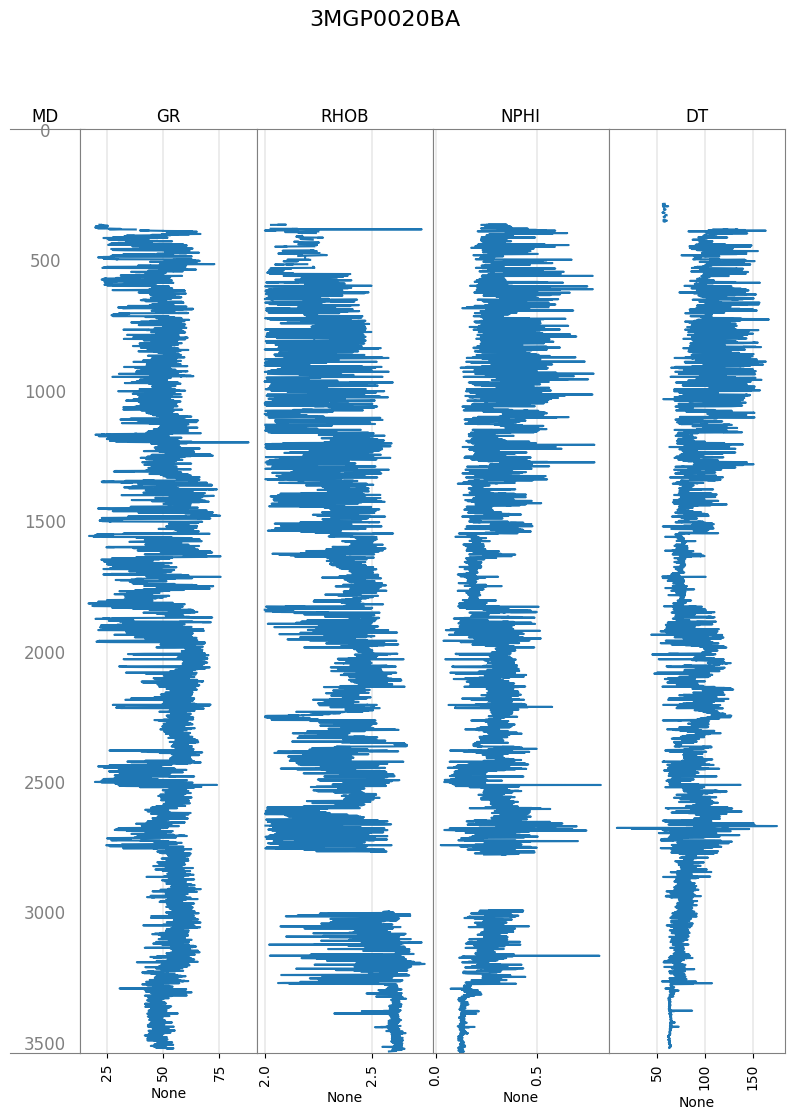

In [30]:
tracks = ['MD', 'GR', 'RHOB', 'NPHI','DT']
well.plot(tracks=tracks)

## Salvar CSV como Las

In [31]:
#Criar arquivo vazio
las_file = lasio.LASFile()

In [32]:
las_file.header

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS log ASCII Standa"),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One line per depth ste"),
  HeaderItem(mnemonic="DLM", unit="", value="SPACE", descr="Column Data Section ")],
 'Well': [HeaderItem(mnemonic="STRT", unit="m", value="nan", descr="START DEPTH"),
  HeaderItem(mnemonic="STOP", unit="m", value="nan", descr="STOP DEPTH"),
  HeaderItem(mnemonic="STEP", unit="m", value="nan", descr="STEP"),
  HeaderItem(mnemonic="NULL", unit="", value="-9999.25", descr="NULL VALUE"),
  HeaderItem(mnemonic="COMP", unit="", value="", descr="COMPANY"),
  HeaderItem(mnemonic="WELL", unit="", value="", descr="WELL"),
  HeaderItem(mnemonic="FLD", unit="", value="", descr="FIELD"),
  HeaderItem(mnemonic="LOC", unit="", value="", descr="LOCATION"),
  HeaderItem(mnemonic="PROV", unit="", value="", descr="PROVINCE"),
  HeaderItem(mnemonic="CNTY", unit="", value="", descr="COUNTY"),
  HeaderItem(mnemonic="STAT", unit=""

In [33]:
las_file.curves

[]

In [34]:
well_name = '3-MGP-4-BA'
field_name = 'Miranga'
uwi = '123456789'
country = 'Brasil'

In [35]:
las_file.well['WELL'] = lasio.HeaderItem('WELL', value=well_name)
las_file.well['FLD'] = lasio.HeaderItem('FLD', value=field_name)
las_file.well['UWI'] = lasio.HeaderItem('UWI', value=uwi)
las_file.well['CTRY'] = lasio.HeaderItem('CTRY', value=country)

In [36]:
las_file.header

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS log ASCII Standa"),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One line per depth ste"),
  HeaderItem(mnemonic="DLM", unit="", value="SPACE", descr="Column Data Section ")],
 'Well': [HeaderItem(mnemonic="STRT", unit="m", value="nan", descr="START DEPTH"),
  HeaderItem(mnemonic="STOP", unit="m", value="nan", descr="STOP DEPTH"),
  HeaderItem(mnemonic="STEP", unit="m", value="nan", descr="STEP"),
  HeaderItem(mnemonic="NULL", unit="", value="-9999.25", descr="NULL VALUE"),
  HeaderItem(mnemonic="COMP", unit="", value="", descr="COMPANY"),
  HeaderItem(mnemonic="WELL", unit="", value="3-MGP-4-BA", descr=""),
  HeaderItem(mnemonic="FLD", unit="", value="Miranga", descr=""),
  HeaderItem(mnemonic="LOC", unit="", value="", descr="LOCATION"),
  HeaderItem(mnemonic="PROV", unit="", value="", descr="PROVINCE"),
  HeaderItem(mnemonic="CNTY", unit="", value="", descr="COUNTY"),
  HeaderItem(mnemonic="STAT",

In [38]:
from lasio import LASFile, CurveItem, HeaderItem

las_file.curves.append(
            CurveItem(mnemonic="DEPT", unit='m', descr="Profundidade", data=df.index)
        )

In [39]:
las_file.curves

[CurveItem(mnemonic="DEPT", unit="m", value="", descr="Profundidade", original_mnemonic="DEPT", data.shape=(17716,))]

In [40]:
cols

['GR', 'SP', 'CALI', 'ILD', 'SFLU', 'DT', 'RHOB', 'DRHO', 'NPHI', 'NEUT']

## Dicionário de Mnemônicos

link: https://www.apps.slb.com/cmd

In [43]:
units = ['API',
 'mV',
 'inches',
 'ohm.m',
 'ohm.m',
 'us/ft',
 'g/cm3',
 'g/cm3',
 ' ',
 'nAPI',
         ]

descs = ["Gamma Ray",
        "Spontaneous Potential",
        "Caliper",
        "Deep Resistivity (ILD)",
        "Shallow Resistivity (SFLU)",
        "Sonic Travel Time (DT)",
        "Density Log (RHOB)",
        "Density Correction (DRHO)",
        "Neutron Porosity (NPHI)",
        "Neutron Log (NEUT)"
       ]

In [44]:
for col, unit, desc in zip(cols, units, descs):
    if col != 'DEPTH':
        las_file.curves.append(
                    CurveItem(mnemonic=col, unit=unit, descr=desc, data=df[col])
                )

In [45]:
las_file.curves

[CurveItem(mnemonic="DEPT", unit="m", value="", descr="Profundidade", original_mnemonic="DEPT", data.shape=(17716,)),
 CurveItem(mnemonic="GR", unit="API", value="", descr="Gamma Ray", original_mnemonic="GR", data.shape=(17716,)),
 CurveItem(mnemonic="SP", unit="mV", value="", descr="Spontaneous Potential", original_mnemonic="SP", data.shape=(17716,)),
 CurveItem(mnemonic="CALI", unit="inches", value="", descr="Caliper", original_mnemonic="CALI", data.shape=(17716,)),
 CurveItem(mnemonic="ILD", unit="ohm.m", value="", descr="Deep Resistivity (ILD)", original_mnemonic="ILD", data.shape=(17716,)),
 CurveItem(mnemonic="SFLU", unit="ohm.m", value="", descr="Shallow Resistivity (SFLU)", original_mnemonic="SFLU", data.shape=(17716,)),
 CurveItem(mnemonic="DT", unit="us/ft", value="", descr="Sonic Travel Time (DT)", original_mnemonic="DT", data.shape=(17716,)),
 CurveItem(mnemonic="RHOB", unit="g/cm3", value="", descr="Density Log (RHOB)", original_mnemonic="RHOB", data.shape=(17716,)),
 Curv

In [53]:
las_file['GR']

array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:
las_file.write("Caminho Final.las")